In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [3]:
data = pd.read_csv("WineQT.csv")

In [9]:
y = data["quality"].values
X = data.drop(columns=["quality"]).values
n, d = X.shape

#Standardlize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = np.hstack([np.ones((n,1)), X_scaled])

2

In [10]:
np.random.seed(42)
beta = np.zeros(X.shape[1])

def gradient_descent(X, y, alpha=0.01, T=2000):
  n = len(y)
  beta = np.zeros(X.shape[1])
  losses = []
  for t in range(T):
    y_hat = X @ beta
    e = y_hat - y
    g = (1/n) * (X.T @ e)
    beta = beta - alpha * g
    L_t = (1/(2*n)) * np.sum(e**2)
    losses.append(L_t)
  return beta, losses

3，4

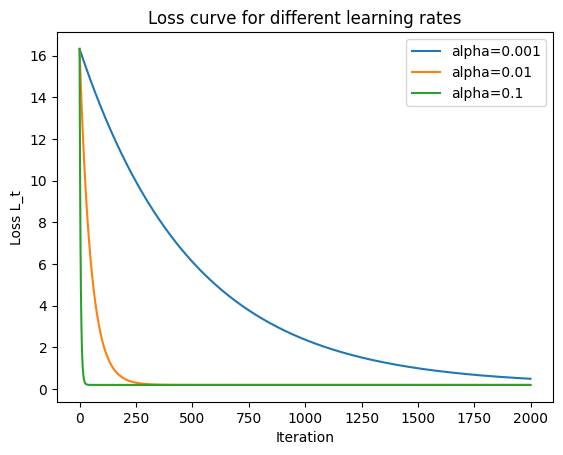

In [11]:
alphas = [0.001, 0.01, 0.1]

for alpha in alphas:
  beta_grad, losses = gradient_descent(X, y, alpha=alpha, T=2000)
  plt.plot(losses, label=f"alpha={alpha}")

plt.xlabel("Iteration")
plt.ylabel("Loss L_t")
plt.title("Loss curve for different learning rates")
plt.legend()
plt.show()

5

In [12]:
beta_grad, losses = gradient_descent(X, y, alpha=0.01, T=2000)

beta_normal = np.linalg.inv(X.T @ X) @ (X.T @ y)

diff = np.linalg.norm(beta_grad - beta_normal)**2

print("Beta (Gradient Descent):", beta_grad[:5], "...")
print("Beta (Normal Equation):", beta_normal[:5], "...")
print("||β_grad - β_normal||^2 =", diff)

Beta (Gradient Descent): [ 5.65704286  0.04777262 -0.20082216 -0.0235249   0.02377585] ...
Beta (Normal Equation): [ 5.65704287  0.03288361 -0.20207044 -0.02399649  0.01897574] ...
||β_grad - β_normal||^2 = 0.0006259207301618346
